In [53]:
from IPython.display import Image
import numpy as np
import pandas as pd
import matplotlib.image
# next command ensures that plots appear inside the notebook
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from bokeh.models import ColorBar, LogColorMapper, LogTicker
from bokeh.plotting import figure, output_file, show
from scipy.ndimage.filters import gaussian_filter

image=mpimg.imread('./stimuli/01_Antwerpen_S1.jpg')
data=pd.read_csv('all_fixation_data_cleaned_up.csv',encoding = "latin1",delim_whitespace=True)

In [54]:
x=mapped['MappedFixationPointX']
y=mapped['MappedFixationPointY']

height, width, c = image.shape

In [55]:
s=64
def myplot(x, y, s, bins=users):
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=(width, height))
    heatmap = gaussian_filter(heatmap, sigma=s)
    

    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    return heatmap.T, extent

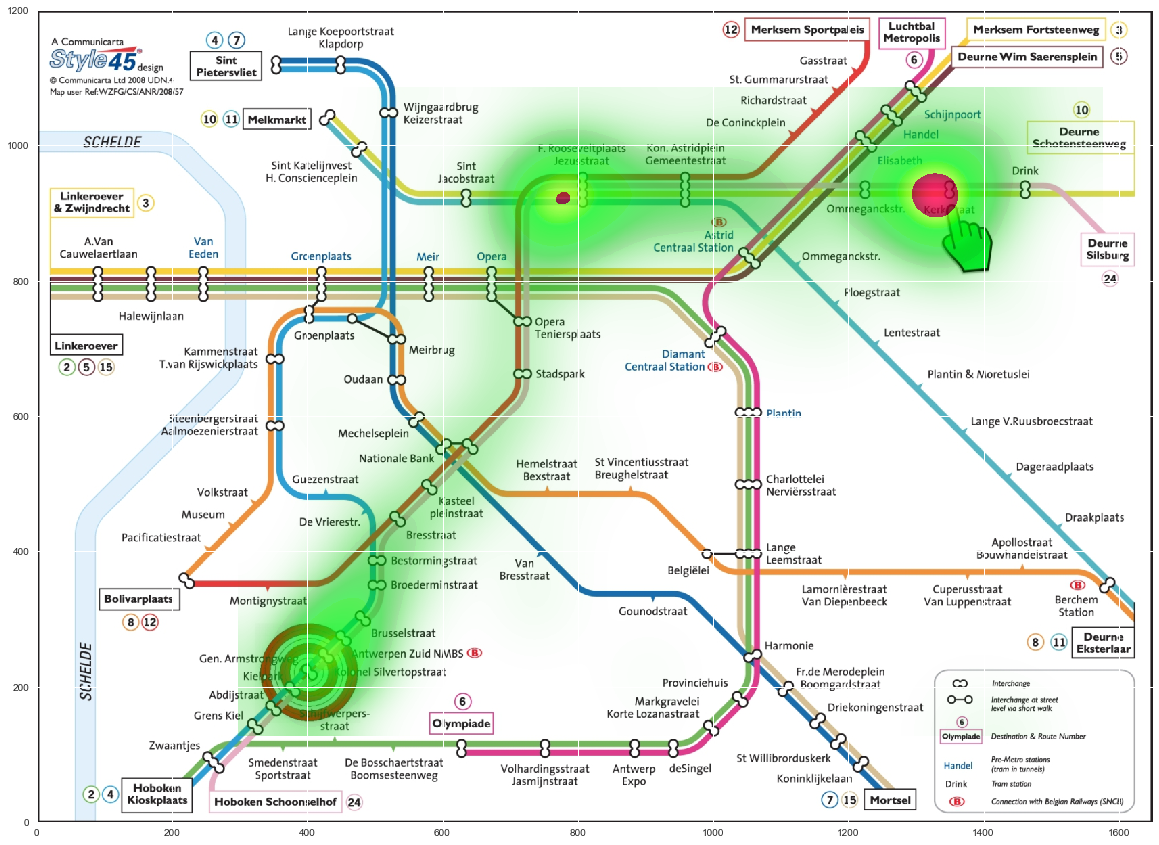

In [56]:
fig3, axes = plt.subplots(nrows=1,ncols=1,figsize=(20,20))
axes.imshow(image, extent=[0, width, 0, height])
s=64
img, extent = myplot(x, y, s)

random_colorscheme = {'red':  ((0.0, 0.0, 0.0),
                   (0.25, 0.0, 0.0),
                   (0.5, 0.0, 0.0),
                   (0.72, 0.0, 0.0),
                   (1.0, 1.0, 1.0)),

         'green': ((0.0, 0.7, 0.8),
                   (0.25, 0.8, 0.7),
                   (0.5, 0.9, 0.9),
                   (0.88, 1.0, 0.0),
                   (1.0, 0.0, 0.0)),

         'blue':  ((0.0, 0.0, 0.0),
                   (0.25, 0.0, 0.0),
                   (0.5, 0.1, 0.0),
                   (0.75, 0.1, 0.0),
                   (1.0, 0.3, 0.0))
        
         }
Test_alpha = random_colorscheme.copy()
Test_alpha['alpha'] = ((0.0, 0.0, 0.0),
                   (0.40,0.6,0.6),
                   (0.60, 0.7, 0.7),
                   (0.80, 0.8, 0.8),
                   (1.0, 0.8, 1.0))

plt.register_cmap(name='Test', data=Test_alpha)


axes.imshow(img, extent=extent, cmap="Test")

plt.xlim(0, width)
plt.ylim(0, height)
plt.show()

